In [1]:
from newsapi import NewsApiClient
import os
from dotenv import load_dotenv

load_dotenv()

newsapi = NewsApiClient(api_key= os.environ.get('NEWS_API'))

In [2]:
import datetime

In [3]:
# /v2/top-headlines/sources
sources = newsapi.get_sources()

### US
Al Jazeera English 
Associated Press 
Bloomberg 
Business Insider
CNN
Fortune
Google News
The Huffington Post
The Verge
The Wall Street Journal
The Washington Post
The Washington Times
Time
CBS
CNBC
NBC
Time
Reuters

### UK
BBC News
Google News UK
Business Insider (UK)


In [4]:
sourcesList = ['al-jazeera-english', 'associated-press', 'bloomberg', 'business-insider', 'cbs-news', 'cnn',
                'fortune', 'google-news', 'msnbc', 'nbc-news', 'reuter', 'the-huffington-post', 'the-verge', 
                'the-wall-street-journal', 'the-washington-post', 'the-washington-times', 'time']

sourcesStitched = ', '.join(sourcesList)

sourcesStitched

'al-jazeera-english, associated-press, bloomberg, business-insider, cbs-news, cnn, fortune, google-news, msnbc, nbc-news, reuter, the-huffington-post, the-verge, the-wall-street-journal, the-washington-post, the-washington-times, time'

In [5]:
today = datetime.date.today()

start = today - datetime.timedelta(days = 30)

In [6]:
query = 'carbon AND (emissions OR climate OR gas OR coal OR energy OR green OR oil OR fuel OR fuels OR power) AND (decarbonize OR decarbonization OR decarbonise OR decarbonisation OR decarboniznig OR decarbonising)'


In [7]:
articles = newsapi.get_everything(
    q = query, 
    sources = sourcesStitched,
    from_param = start,
    to = today,
    language = 'en',
    sort_by = 'popularity' 
    )

#articles

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import plotly.express as px

In [9]:
data = pd.DataFrame(articles['articles'])

In [10]:
data['publishedAt'] = pd.to_datetime(data['publishedAt']).dt.date

In [11]:
px.bar(data['publishedAt'])

In [12]:
data.head()

,source,author,title,description,url,urlToImage,publishedAt,content
0,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma,The Supreme Court just took away an EPA tool t...,The Supreme Court’s decision on a major climat...,https://www.theverge.com/2022/6/30/23184791/su...,https://cdn.vox-cdn.com/thumbor/vbgsd4TvsK2a_9...,2022-06-30,"The Longview Power Plant, a coal-fired plant, ..."
1,"{'id': 'business-insider', 'name': 'Business I...",insider@insider.com (Sponsor Post),The future of lower-emission transportation fuels,ExxonMobil recently spoke with Russ Green abou...,https://www.businessinsider.com/sc/the-future-...,https://i.insider.com/62a8e2726053710019ea3ae4...,2022-06-21,"For 30 years, Russ Green has worked primarily ..."
2,"{'id': 'business-insider', 'name': 'Business I...",mfox@businessinsider.com (Matthew Fox),Commodity prices will stay 'structurally highe...,"""Wind turbine farms and EVs require staggering...",https://markets.businessinsider.com/news/commo...,https://i.insider.com/62c45f0bd3ac7e00197af969...,2022-07-05,"Commodity prices will remain ""structurally hig..."
3,"{'id': 'business-insider', 'name': 'Business I...","jhood@businessinsider.com (Julia Hood,Elisa Xu)",Acronyms and jargon make sustainability report...,Acronyms and jargon are common in the world of...,https://www.businessinsider.com/companies-need...,https://i.insider.com/62d16a5fb0ab4f001853d8c1...,2022-07-21,"When it comes to sustainability disclosure, or..."
4,"{'id': 'time', 'name': 'Time'}",Alejandro de la Garza,We’re Gonna Need a Greener Boat,Container ships transport just about everythin...,https://time.com/6189877/maritime-shipping-gre...,https://api.time.com/wp-content/uploads/2022/0...,2022-06-23,Container ships transport just about everythin...


In [13]:
listCounts = []

for single_date in (start + datetime.timedelta(n) for n in range(30)):
    listCounts.append({'date': single_date.strftime('%Y-%m-%d'), 'count': len(data[data['publishedAt'] == single_date])})

listCounts

[{'date': '2022-06-21', 'count': 2},
 {'date': '2022-06-22', 'count': 2},
 {'date': '2022-06-23', 'count': 1},
 {'date': '2022-06-24', 'count': 0},
 {'date': '2022-06-25', 'count': 0},
 {'date': '2022-06-26', 'count': 0},
 {'date': '2022-06-27', 'count': 0},
 {'date': '2022-06-28', 'count': 5},
 {'date': '2022-06-29', 'count': 1},
 {'date': '2022-06-30', 'count': 4},
 {'date': '2022-07-01', 'count': 3},
 {'date': '2022-07-02', 'count': 0},
 {'date': '2022-07-03', 'count': 0},
 {'date': '2022-07-04', 'count': 0},
 {'date': '2022-07-05', 'count': 1},
 {'date': '2022-07-06', 'count': 1},
 {'date': '2022-07-07', 'count': 3},
 {'date': '2022-07-08', 'count': 0},
 {'date': '2022-07-09', 'count': 0},
 {'date': '2022-07-10', 'count': 0},
 {'date': '2022-07-11', 'count': 0},
 {'date': '2022-07-12', 'count': 1},
 {'date': '2022-07-13', 'count': 2},
 {'date': '2022-07-14', 'count': 2},
 {'date': '2022-07-15', 'count': 0},
 {'date': '2022-07-16', 'count': 0},
 {'date': '2022-07-17', 'count': 0},
 

In [14]:
import json

exp = json.dumps(listCounts)

with open('../data/listCounts2.json', 'w') as f:
    f.write(exp)

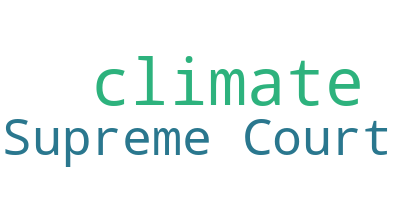

In [146]:
from wordcloud import WordCloud

longString = ','.join(list(data['title']))

cloud = WordCloud(background_color = 'white', max_words = 2, contour_width = 3, contour_color = 'blue')

cloud.generate(longString)

cloud.to_image()

In [188]:
import nltk

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk import pos_tag

import string

from rake_nltk import Rake

rake = Rake()

stop_words = set(stopwords.words('english'))

In [158]:
data.head(1)

,source,author,title,description,url,urlToImage,publishedAt,content,text,keys10
0,"{'id': 'the-verge', 'name': 'The Verge'}",Justine Calma,The Supreme Court just took away an EPA tool t...,The Supreme Court’s decision on a major climat...,https://www.theverge.com/2022/6/30/23184791/su...,https://cdn.vox-cdn.com/thumbor/vbgsd4TvsK2a_9...,2022-06-30,"The Longview Power Plant, a coal-fired plant, ...",The Supreme Court just took away an EPA tool t...,"[major, climate, change, case, west, virginia,..."


In [159]:
data['text'] = data['title'] + ' ' + data['description'].apply(lambda x: x.split('…')[0][:-1] + '.') + ' ' + data['content'].apply(lambda x: x.split('…')[0] + '.')

In [169]:
def raking(x):
    x = x.translate(str.maketrans('', '', string.punctuation))

    rake.extract_keywords_from_text(x)
    phrases = rake.get_ranked_phrases()

    return [token for token in word_tokenize(phrases[0]) if ((not token.lower() in stop_words) and (len(token) > 1) and (not pos_tag([token]) in ['JJ', 'JJR', 'JJS', 'DT', 'PDT', 'PRP', 'RB', 'RBR', 'RBS', 'RP']) and (dictEng.check(token)))]

    #return [(' '.join([token for token in word_tokenize(phrase[1]) if ((not token.lower() in stop_words) and (len(token) > 1))])) for phrase in phrases if phrase[0] >= 10]
    
data['keys'] = data['text'].apply(raking)

In [199]:
word = data['description'][0].translate(str.maketrans('', '', string.punctuation))

rake.extract_keywords_from_text(word)
phrases = rake.get_ranked_phrases()

rake.extract_keywords_from_text(' '.join(phrases))
phrases2 = rake.get_ranked_phrases()


[(token, pos_tag([token])) for token in word_tokenize(''.join(phrases2)) if ((not token.lower() in stop_words) and (len(token) > 1) and (not pos_tag([token])[0][1] in ['JJ', 'JJR', 'JJS', 'DT', 'PDT', 'PRP', 'RB', 'RBR', 'RBS', 'RP', 'WRB', 'VBZ', 'VBP', 'VBN', 'VBG', 'VBD', 'VB']) )]

[('climate', [('climate', 'NN')]),
 ('change', [('change', 'NN')]),
 ('case', [('case', 'NN')]),
 ('west', [('west', 'NN')]),
 ('virginia', [('virginia', 'NN')]),
 ('protection', [('protection', 'NN')]),
 ('agency', [('agency', 'NN')]),
 ('greenhouse', [('greenhouse', 'NN')]),
 ('gas', [('gas', 'NN')]),
 ('emissions', [('emissions', 'NNS')]),
 ('supreme', [('supreme', 'NN')]),
 ('court', [('court', 'NN')]),
 ('power', [('power', 'NN')]),
 ('plants', [('plants', 'NNS')]),
 ('states', [('states', 'NNS')]),
 ('harder', [('harder', 'NN')]),
 ('epa', [('epa', 'NN')]),
 ('decision', [('decision', 'NN')]),
 ('crack', [('crack', 'NN')]),
 ('congress', [('congress', 'NN')]),
 ('clean', [('clean', 'NN')])]

In [1]:
data.head()

NameError: name 'data' is not defined

In [117]:
data.sample(5)['keys10'].values

array([list(['conservative', 'environmental', 'lawyer', 'jeffrey', 'holmstead', 'joined', 'supreme', 'court', 'ruling', 'fossil', 'fuel', 'business', 'electric', 'power', 'companies', 'article', 'actions', 'load']),
       list(['climate', 'metrics', 'among', 'listed', 'co', 'henry', 'fernandez', 'country', 'world', 'investable', 'market', 'index', 'opinion', 'ways', 'governments', '15degree', 'pathway', 'according', '15', 'degrees', 'celsius']),
       list(['cathy', 'bussewitz', 'ap', 'energy', 'writer', 'new', 'york', 'ap', 'supreme', 'court', 'decision', 'may', 'slow', 'transition', 'supreme', 'court', 'ruling', 'limiting', 'supreme', 'court', 'ruling', 'limiting', 'regulate', 'greenhouse', 'gas', 'emissions']),
       list(['match', 'fossilfuel', 'generated', 'power', 'blackrock', 'said', 'commodity', 'prices', 'surging', 'demand', 'blackrock', 'warns', 'wind', 'turbine', 'farms', 'rising', 'global', 'demand', 'blackrock', 'warned', 'investment', 'giant', 'sees', 'oil', 'price', '